## 下載模組

In [ ]:
!pip install SpeechRecognition  # 語音辨識
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg  # 語音辨識
!pip install pydub  # 語音檔轉換
!pip install opencc-python-reimplemented  # 繁體、簡體中文轉換

     |████████████████████████████████| 32.8 MB 1.7 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.6).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 42 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd

## 匯入模組

In [ ]:
import os
import speech_recognition as sr  # 語音辨識
import numpy as np 
import pandas as pd

from pydub import AudioSegment  # 轉換檔案格式
from collections import Counter  # 計算次數用
from opencc import OpenCC  # 繁體、簡體中文轉換

## 主程式

In [ ]:
# 創建資料夾
folder_name = ["mp3", "wav"]
for folder in folder_name:
    if not os.path.exists(folder):
        os.makedirs(folder)

### <font color=#FF3030>先把錄音檔放到 "mp3" 資料夾底下後，再去執行之後的程式碼</font>

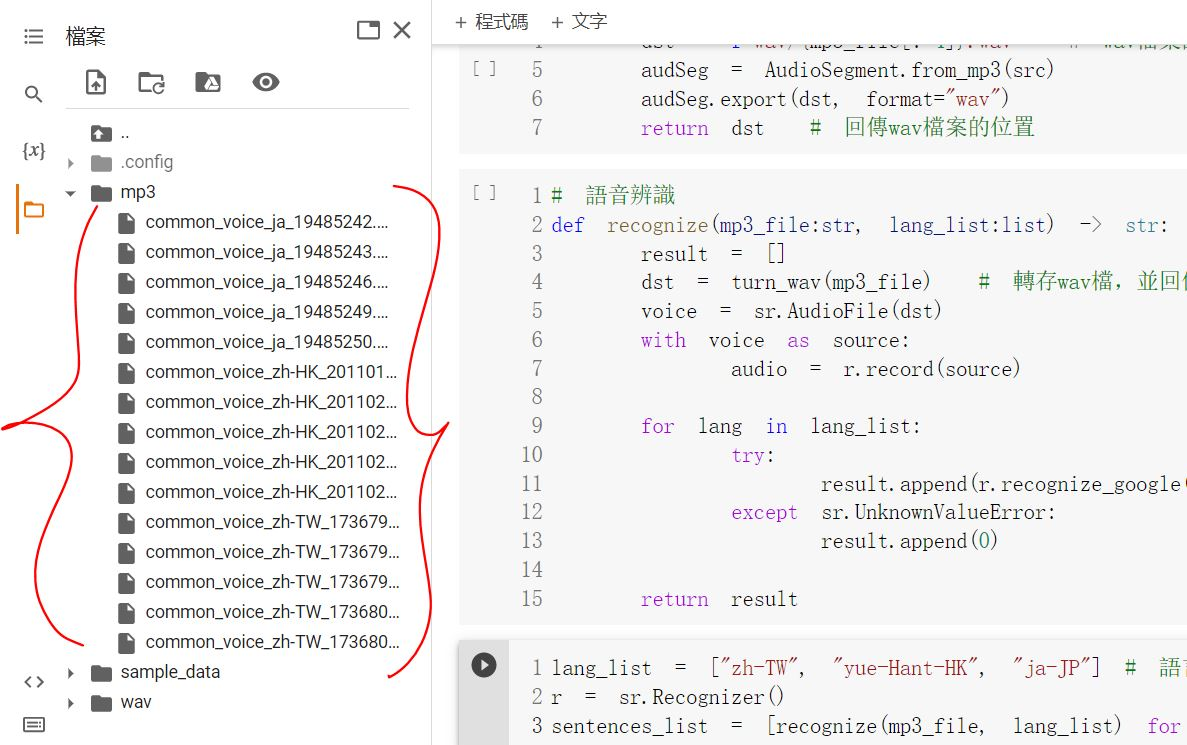

In [ ]:
# 轉存wav檔
def turn_wav(mp3_file:str) -> str:
    src = f"mp3/{mp3_file}"  # mp3檔案的位置
    dst = f"wav/{mp3_file[:-4]}.wav"  # wav檔案的位置
    audSeg = AudioSegment.from_mp3(src)
    audSeg.export(dst, format="wav")
    return dst  # 回傳wav檔案的位置

In [ ]:
# 嘗試回傳各個語言的結果
def try_return(lang:str) -> str:
    try:
        return (r.recognize_google(audio, language=lang))
    except sr.UnknownValueError:  # 避免程式因為聽不懂語音，而出現錯誤
        return "I don't know"

In [ ]:
# 語音辨識
def recognize(mp3_file:str, lang_list:list) -> list:
    dst = turn_wav(mp3_file)  # 轉存wav檔，並回傳wav檔案的位置

    voice = sr.AudioFile(dst)
    with voice as source:
        global audio
        audio = r.record(source)

    # 嘗試回傳各個語言的結果
    result = [try_return(lang) for lang in lang_list]
 
    return result

In [ ]:
# 整個函式長這樣
# def recognize(mp3_file:str, lang_list:list) -> list:
#
#     # 轉成wav檔案
#     src = f"mp3/{mp3_file}"  # mp3檔案的位置
#     dst = f"wav/{mp3_file[:-4]}.wav"  # wav檔案的位置
#     audSeg = AudioSegment.from_mp3(src)
#     audSeg.export(dst, format="wav")
#
#     # 聽取檔案
#     voice = sr.AudioFile(dst)
#     with voice as source:
#         audio = r.record(source)
#
#     # 嘗試回傳各個語言的結果
#     result = []
#     for lang in lang_list:
#         try:
#             result.append(r.recognize_google(audio, language=lang))
#         except sr.UnknownValueError:  # 避免程式因為聽不懂語音，而出現錯誤
#             result.append(0)
# 
#     return result

In [ ]:
lang_list = ["zh-TW", "ar-SA", "ja-JP"] # 語言
r = sr.Recognizer()
sentences_list = [recognize(mp3_file, lang_list) for mp3_file in os.listdir("mp3")]

同一個語音會使用三種語言去判讀，並回傳各自的結果 （代表一筆錄音檔會有三筆結果）\
或許可以藉由分析這三個結果，來判斷使用的語言為何 \


In [ ]:
sentences_list = np.array(sentences_list)
sentences_list

array([['management happyhappy', 'ما اجمل هذه الحديقه', '松村 羽曳野埴生'],
       ['Panasonic solve the closest', 'سمكه السنونو',
        '田中さんの奥さんは 大学の先生です'],
       ['听无地上哇哇', 'تمور السماء كوري مشتا', '木村様は私に 戦士を見せてくれました'],
       ['以前真的是也整理规划', 'ايجنت', 'イジェン山 です 家に行こうよ 4'],
       ['还用kinit headers minus8', 'هل يمكنني التحدث مع المسؤول هنا',
        'ファンケルネットハンド 閉まります 大人'],
       ['说明病猫的重要性', 'سومه انت معوده يا وسيم', 'しょうみん ぴん 真央でとんやおしん'],
       ['we also know the higher the data Can I take me to this old man',
        'بيو شنو', '美容所の母親が誰かに手紙の代筆をたもの'],
       ['goodnotes', 'كنت جائع او عطا', '金とジャイアンのアクション'],
       ['德州conduct amazon.de', 'الكره تو يو', '0があるからやめると散々言われた'],
       ['晚上都做梦到哭', 'وانسان طوطو', '割り算とオトモン タオル'],
       ['保存着他们的记忆', "I don't know", '塩ラーメンでいい'],
       ['客厅都没开灯', "I don't know", 'プリント メーカー'],
       ['这句话以及ambassador at Amazon', 'تيتي واه', '父は以前はバスで仕事 似たものだ'],
       ['halion Sonic 3', 'هل لي ان استعير ام نقصك', 'ハリヤナ州 平和晃'],
       ['celebrity ammonia to

In [ ]:
sentences_list.shape

(15, 3)

## 轉成數字（使用 ascii 編碼）

我不確定這個方式的可行性，很方便但感覺有點草率

In [ ]:
num_list = []  # 總陣列
for sentences in sentences_list:  # 每個迴圈，代表一筆錄音檔（三個句子）
    result = [[ord(word) for word in sentence] for sentence in sentences]  # 將每個句子的每個字元，轉成數字後存入陣列
    num_list.append(result)  # 將三筆數字陣列加入總陣列中

In [ ]:
# 可以理解成這樣
# num_list = []  # 總陣列
# for sentences in sentences_list:  # 每個迴圈，代表一筆錄音檔（三個句子）
#     result = []  # 回傳用的陣列
#
#     for sentence in sentences:  # 每個迴圈，代表一個句子
#         result.append([ord(word) for word in sentence])  # 句子的每個字元，轉成數字後存入陣列，並將該陣列加入回傳用的陣列中
#
#     num_list.append(result)  # 將三筆數字陣列加入總陣列中

In [ ]:
# 也可以這樣打，但因為有三個迴圈，會很難看懂，所以不推薦（最多放兩個迴圈就好）
# num_list = [[ord(word) for word in sentence] for sentences in sentences_list for sentence in sentences]

In [ ]:
num_list = np.array(num_list)
num_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


array([[list([109, 97, 110, 97, 103, 101, 109, 101, 110, 116, 32, 104, 97, 112, 112, 121, 104, 97, 112, 112, 121]),
        list([1605, 1575, 32, 1575, 1580, 1605, 1604, 32, 1607, 1584, 1607, 32, 1575, 1604, 1581, 1583, 1610, 1602, 1607]),
        list([26494, 26449, 32, 32701, 26355, 37326, 22516, 29983])],
       [list([80, 97, 110, 97, 115, 111, 110, 105, 99, 32, 115, 111, 108, 118, 101, 32, 116, 104, 101, 32, 99, 108, 111, 115, 101, 115, 116]),
        list([1587, 1605, 1603, 1607, 32, 1575, 1604, 1587, 1606, 1608, 1606, 1608]),
        list([30000, 20013, 12373, 12435, 12398, 22885, 12373, 12435, 12399, 32, 22823, 23398, 12398, 20808, 29983, 12391, 12377])],
       [list([21548, 26080, 22320, 19978, 21703, 21703]),
        list([1578, 1605, 1608, 1585, 32, 1575, 1604, 1587, 1605, 1575, 1569, 32, 1603, 1608, 1585, 1610, 32, 1605, 1588, 1578, 1575]),
        list([26408, 26449, 27096, 12399, 31169, 12395, 32, 25126, 22763, 12434, 35211, 12379, 12390, 12367, 12428, 12414, 12375, 1238

In [ ]:
num_list.shape

(15, 3)

### 還原

In [ ]:
for sentences in num_list:
    for sentence in sentences:
        print("".join([chr(word) for word in sentence]))

management happyhappy
ما اجمل هذه الحديقه
松村 羽曳野埴生
Panasonic solve the closest
سمكه السنونو
田中さんの奥さんは 大学の先生です
听无地上哇哇
تمور السماء كوري مشتا
木村様は私に 戦士を見せてくれました
以前真的是也整理规划
ايجنت
イジェン山 です 家に行こうよ 4
还用kinit headers minus8
هل يمكنني التحدث مع المسؤول هنا
ファンケルネットハンド 閉まります 大人
说明病猫的重要性
سومه انت معوده يا وسيم
しょうみん ぴん 真央でとんやおしん
we also know the higher the data Can I take me to this old man
بيو شنو
美容所の母親が誰かに手紙の代筆をたもの
goodnotes
كنت جائع او عطا
金とジャイアンのアクション
德州conduct amazon.de
الكره تو يو
0があるからやめると散々言われた
晚上都做梦到哭
وانسان طوطو
割り算とオトモン タオル
保存着他们的记忆
I don't know
塩ラーメンでいい
客厅都没开灯
I don't know
プリント メーカー
这句话以及ambassador at Amazon
تيتي واه
父は以前はバスで仕事 似たものだ
halion Sonic 3
هل لي ان استعير ام نقصك
ハリヤナ州 平和晃
celebrity ammonia to China
سيارتي المانيه الصنع
フェアレディ 雨宮 塗装な


## 剛好看到語言偵測的模組，所以拿來玩玩看（不會放進報告中）

In [ ]:
!pip install langdetect

     |████████████████████████████████| 981 kB 5.4 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=bff8e2221affd6068a9d64861ccbd1bfc88ae50a956a6706de013e9523140d51
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
# 沒有支援廣東話
from langdetect import detect

In [ ]:
detection_list = []
for sentences in sentences_list:
    detection_list.append([detect(sentence) for sentence in sentences])

In [ ]:
sentences_list

[['management happyhappy', 'ما اجمل هذه الحديقه', '松村 羽曳野埴生'],
 ['Panasonic solve the closest', 'سمكه السنونو', '田中さんの奥さんは 大学の先生です'],
 ['听无地上哇哇', 'تمور السماء كوري مشتا', '木村様は私に 戦士を見せてくれました'],
 ['以前真的是也整理规划', 'ايجنت', 'イジェン山 です 家に行こうよ 4'],
 ['还用kinit headers minus8',
  'هل يمكنني التحدث مع المسؤول هنا',
  'ファンケルネットハンド 閉まります 大人'],
 ['说明病猫的重要性', 'سومه انت معوده يا وسيم', 'しょうみん ぴん 真央でとんやおしん'],
 ['we also know the higher the data Can I take me to this old man',
  'بيو شنو',
  '美容所の母親が誰かに手紙の代筆をたもの'],
 ['goodnotes', 'كنت جائع او عطا', '金とジャイアンのアクション'],
 ['德州conduct amazon.de', 'الكره تو يو', '0があるからやめると散々言われた'],
 ['晚上都做梦到哭', 'وانسان طوطو', '割り算とオトモン タオル'],
 ['保存着他们的记忆', "I don't know", '塩ラーメンでいい'],
 ['客厅都没开灯', "I don't know", 'プリント メーカー'],
 ['这句话以及ambassador at Amazon', 'تيتي واه', '父は以前はバスで仕事 似たものだ'],
 ['halion Sonic 3', 'هل لي ان استعير ام نقصك', 'ハリヤナ州 平和晃'],
 ['celebrity ammonia to China', 'سيارتي المانيه الصنع', 'フェアレディ 雨宮 塗装な']]

In [ ]:
detection_list

[['nl', 'ar', 'zh-cn'],
 ['en', 'ar', 'ja'],
 ['ko', 'ar', 'ja'],
 ['zh-cn', 'fa', 'ja'],
 ['et', 'ar', 'ja'],
 ['zh-cn', 'fa', 'ja'],
 ['en', 'fa', 'ja'],
 ['sl', 'ar', 'ja'],
 ['ro', 'ar', 'ja'],
 ['ko', 'fa', 'ja'],
 ['zh-cn', 'en', 'ja'],
 ['zh-cn', 'en', 'ja'],
 ['hu', 'fa', 'ja'],
 ['en', 'ar', 'ja'],
 ['en', 'ar', 'ja']]